In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

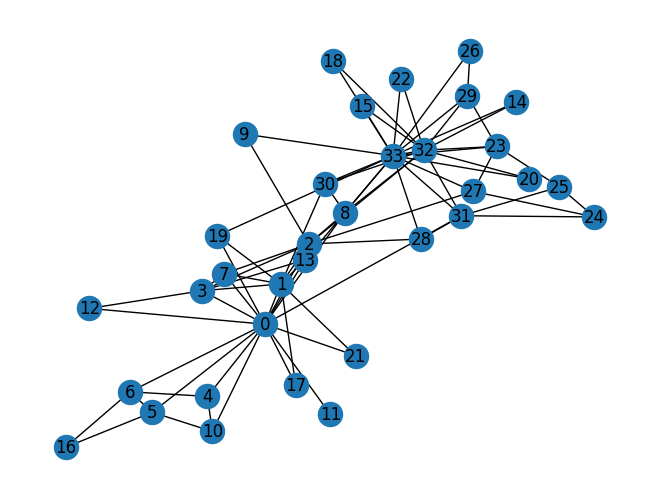

In [2]:
G = nx.karate_club_graph()
nx.draw(G, with_labels=True)
plt.show()

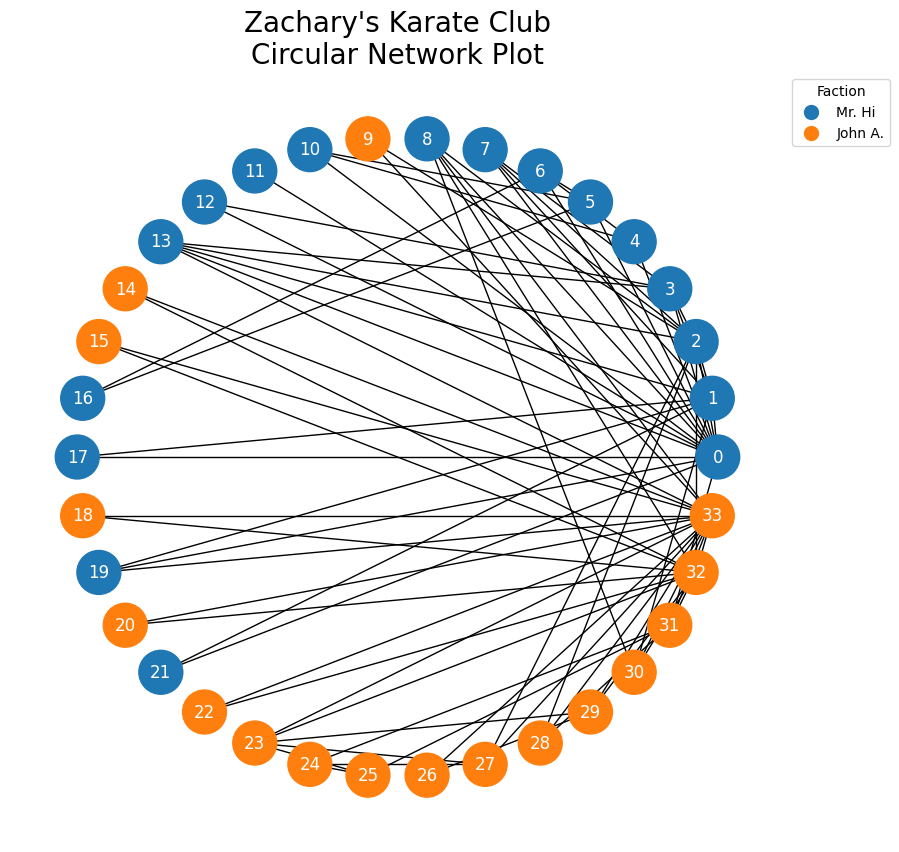

In [6]:
import matplotlib.pyplot as plt
import networkx as nx
from hiveplotlib import Axis, HivePlot
from hiveplotlib.converters import networkx_to_nodes_edges
from hiveplotlib.viz import axes_viz, edge_viz, node_viz
from matplotlib.lines import Line2D

%matplotlib inline
G = nx.karate_club_graph()
color = []
for node in G.nodes():
    if G.nodes.data()[node]["club"] == "Mr. Hi":
        color.append("C0")
    else:
        color.append("C1")

fig, ax = plt.subplots(figsize=(10, 10))
plt.axis("equal")
nx.draw_circular(
    G, with_labels=True, node_color=color, ax=ax, font_color="white", node_size=1000
)
ax.set_title("Zachary's Karate Club\nCircular Network Plot", fontsize=20)

# legend
john_a_legend = Line2D(
    [],
    [],
    markerfacecolor="C1",
    markeredgecolor="C1",
    marker="o",
    linestyle="None",
    markersize=10,
)

mr_hi_legend = Line2D(
    [],
    [],
    markerfacecolor="C0",
    markeredgecolor="C0",
    marker="o",
    linestyle="None",
    markersize=10,
)

ax.legend(
    [mr_hi_legend, john_a_legend],
    ["Mr. Hi", "John A."],
    loc="upper left",
    bbox_to_anchor=(1, 1),
    title="Faction",
)
plt.show()

In [3]:
num_nodes = G.number_of_nodes()
node_features = np.zeros((num_nodes, num_nodes))
for i in range(num_nodes):
    node_features[i, i] = 1

In [4]:
class GraphConvolution(nn.Module):
    def __init__(self, in_features, out_features):
        super(GraphConvolution, self).__init__()
        self.fc = nn.Linear(in_features, out_features)

    def forward(self, x, adj):
        x = self.fc(x)
        x = torch.mm(adj, x)
        return x

In [6]:
class GCN(nn.Module):
    def __init__(self, in_features, hidden_features, out_features):
        super(GCN, self).__init__()
        self.gc1 = GraphConvolution(in_features, hidden_features)
        self.gc2 = GraphConvolution (hidden_features, out_features) 
        self.fc = nn.Linear(hidden_features, out_features)

In [7]:
def forward(self, x, adj):
    x = self.gc1(x, adj)
    x = torch.relu(x)
    x = self.gc2(x, adj)
    x = torch.relu(x)
    x = self.fc(x)
    return x

In [10]:
num_classes = 2
adj = nx.adjacency_matrix(G).toarray()
labels = np.zeros((num_nodes, num_classes))
model = GCN(num_nodes, 8, num_classes)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()

for epoch in range(20):
    outputs = model(node_features, adj)
    loss = criterion(outputs, labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

NotImplementedError: Module [GCN] is missing the required "forward" function

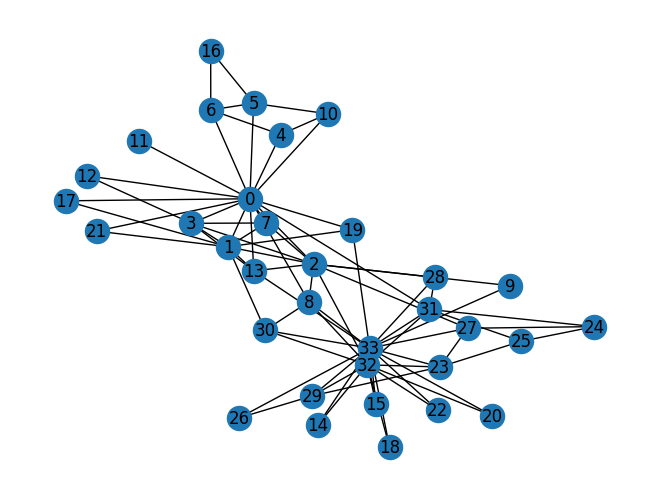

Epoch [20/200], Loss: 0.0234
Epoch [40/200], Loss: 0.0196
Epoch [60/200], Loss: 0.0120
Epoch [80/200], Loss: 0.0096
Epoch [100/200], Loss: 0.0077
Epoch [120/200], Loss: 0.0062
Epoch [140/200], Loss: 0.0051
Epoch [160/200], Loss: 0.0042
Epoch [180/200], Loss: 0.0036
Epoch [200/200], Loss: 0.0030


In [11]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

# Load the Karate club graph and draw it
G = nx.karate_club_graph()
nx.draw(G, with_labels=True)
plt.show()

# Define the number of nodes
num_nodes = G.number_of_nodes()

# Create one-hot node features
node_features = np.zeros((num_nodes, num_nodes))
for i in range(num_nodes):
    node_features[i, i] = 1

# Convert node features to PyTorch tensor
node_features = torch.tensor(node_features, dtype=torch.float32)

# Create adjacency matrix and convert to PyTorch tensor
adj = nx.adjacency_matrix(G).todense()
adj = torch.tensor(adj, dtype=torch.float32)

# Define number of classes for Karate club (2 classes: Mr. Hi and Officer)
num_classes = 2
labels = []
for i in range(num_nodes):
    labels.append(0 if G.nodes[i]['club'] == 'Mr. Hi' else 1)
labels = torch.tensor(labels, dtype=torch.long)

# Define the Graph Convolution Layer
class GraphConvolution(nn.Module):
    def __init__(self, in_features, out_features):
        super(GraphConvolution, self).__init__()
        self.fc = nn.Linear(in_features, out_features)

    def forward(self, x, adj):
        x = self.fc(x)
        x = torch.mm(adj, x)
        return x

# Define the GCN Model
class GCN(nn.Module):
    def __init__(self, in_features, hidden_features, out_features):
        super(GCN, self).__init__()
        self.gc1 = GraphConvolution(in_features, hidden_features)
        self.gc2 = GraphConvolution(hidden_features, out_features)
    
    def forward(self, x, adj):
        x = self.gc1(x, adj)
        x = torch.relu(x)
        x = self.gc2(x, adj)
        return x

# Instantiate the model, optimizer, and loss function
model = GCN(num_nodes, 8, num_classes)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()

# Training loop
for epoch in range(200):
    # Forward pass
    outputs = model(node_features, adj)
    
    # Compute the loss
    loss = criterion(outputs, labels)
    
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print loss for every 20 epochs
    if (epoch + 1) % 20 == 0:
        print(f'Epoch [{epoch+1}/200], Loss: {loss.item():.4f}')


In [16]:
# Define a mapping from class index to label
class_mapping = {0: 'Mr. Hi', 1: 'Officer'}

# Print predicted class labels for each node
print("Predicted club for each node:")
for node, prediction in enumerate(predicted_classes):
    label = class_mapping[prediction.item()]
    print(f"Node {node}: Club {label}")


Predicted club for each node:
Node 0: Club Mr. Hi
Node 1: Club Mr. Hi
Node 2: Club Mr. Hi
Node 3: Club Mr. Hi
Node 4: Club Mr. Hi
Node 5: Club Mr. Hi
Node 6: Club Mr. Hi
Node 7: Club Mr. Hi
Node 8: Club Mr. Hi
Node 9: Club Officer
Node 10: Club Mr. Hi
Node 11: Club Mr. Hi
Node 12: Club Mr. Hi
Node 13: Club Mr. Hi
Node 14: Club Officer
Node 15: Club Officer
Node 16: Club Mr. Hi
Node 17: Club Mr. Hi
Node 18: Club Officer
Node 19: Club Mr. Hi
Node 20: Club Officer
Node 21: Club Mr. Hi
Node 22: Club Officer
Node 23: Club Officer
Node 24: Club Officer
Node 25: Club Officer
Node 26: Club Officer
Node 27: Club Officer
Node 28: Club Officer
Node 29: Club Officer
Node 30: Club Officer
Node 31: Club Officer
Node 32: Club Officer
Node 33: Club Officer
